In [1]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt

C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\forecasting\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv(r"D:\Mas Yugo\Data Dummy Power Consumption (2014 - 2018) FIXXX.csv")

In [3]:
#Baca dataset
data['ds'] = data['Datetime']
data['y'] = data['Energy (WH)']

#print(data['ds'])

In [4]:
#Model
model = Prophet()
model.fit(data)

19:39:43 - cmdstanpy - INFO - Chain [1] start processing
19:39:59 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
#Forecasting

future = model.make_future_dataframe(periods=8760, freq='60min')
future.tail(20)


,ds
52558,2019-12-31 04:00:00
52559,2019-12-31 05:00:00
52560,2019-12-31 06:00:00
52561,2019-12-31 07:00:00
52562,2019-12-31 08:00:00
52563,2019-12-31 09:00:00
52564,2019-12-31 10:00:00
52565,2019-12-31 11:00:00
52566,2019-12-31 12:00:00
52567,2019-12-31 13:00:00


In [28]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
52573,2019-12-31 19:00:00,29743.223587,18711.348263,40216.750966
52574,2019-12-31 20:00:00,28677.845394,17249.974008,39231.344542
52575,2019-12-31 21:00:00,27765.039707,17343.685058,38717.965613
52576,2019-12-31 22:00:00,27096.436035,16367.276918,38095.178794
52577,2019-12-31 23:00:00,26739.032013,15972.005324,37818.413875


C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\forecasting\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\forecasting\lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\forecasting\lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future versi

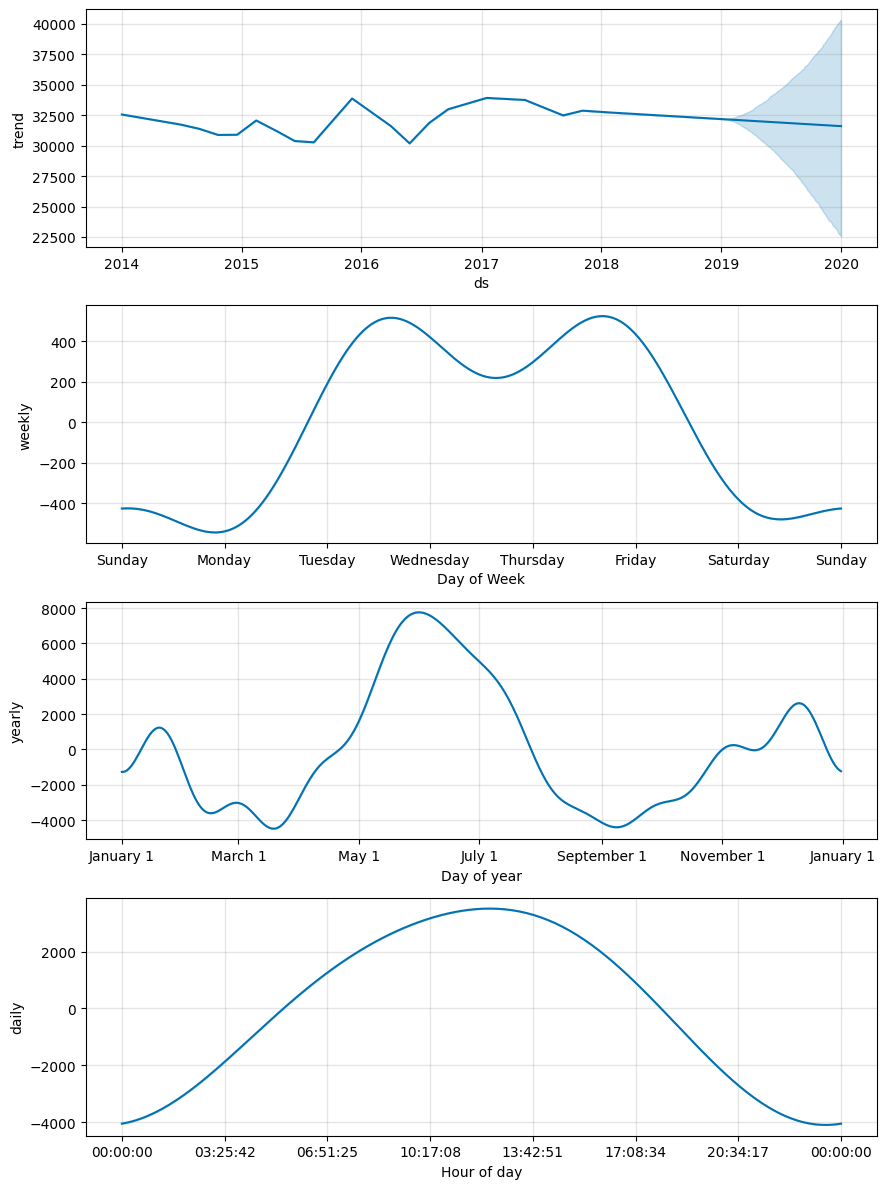

In [29]:
plot = model.plot_components(forecast)

In [44]:
filtered_forecast = forecast[forecast['ds'] > '2019-01-01']

df = pd.DataFrame(filtered_forecast[['ds','yhat']])

In [45]:
df.to_excel('result.xlsx')

PermissionError: [Errno 13] Permission denied: 'result.xlsx'